In [1]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

In [2]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [3]:
arquivo="comp_bikes_mod.csv"
df_comp_bikes= pd.read_csv(arquivo)

In [4]:
#apresentando as 5 primeiras linhas do dataset comp_bikes_mod
df_comp_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [5]:
df_comp_bikes.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [6]:
#Verificando as instâncias e as características do dataframe
df_comp_bikes.shape

(17379, 17)

In [7]:
#analisando a estatística do dataset com o método describe
df_comp_bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
# Desconsiderando dados com nulo na coluna dteday
df_sem_dteday_null = df_comp_bikes.dropna(subset=['dteday'])

df_sem_dteday_null.head()
df_sem_dteday_null.info()
df_sem_dteday_null.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# Converter dteday to datetime
df_sem_dteday_null['dteday'] = pd.to_datetime(df_sem_dteday_null['dteday'], format="%Y-%m-%d")
df_sem_dteday_null.tail(10) # ùltimos registros do dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17368,17369.0,2012-12-31,1.0,1.0,12.0,13.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.44,0.1642,38.0,NaN,203.0
17369,17370.0,2012-12-31,1.0,1.0,12.0,14.0,NaN,1.0,1.0,2.0,NaN,0.2727,0.45,0.2239,62.0,185.0,247.0
17370,NaN,2012-12-31,1.0,1.0,12.0,15.0,NaN,1.0,1.0,2.0,0.28,0.2879,0.45,0.1343,69.0,246.0,315.0
17371,17372.0,2012-12-31,NaN,1.0,12.0,16.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.48,0.1940,30.0,184.0,214.0
17372,17373.0,2012-12-31,1.0,1.0,12.0,17.0,0.0,1.0,1.0,NaN,0.26,0.2879,0.48,0.0896,14.0,150.0,164.0
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


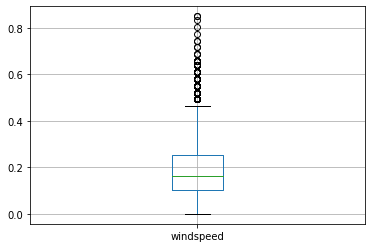

In [12]:
# Possíveis Outliers
df_sem_dteday_null[['windspeed']].boxplot()

In [13]:
# Proporção de valores nulos em temp

total_null_temp = df_comp_bikes['temp'].isna().sum()
total_linhas = df_comp_bikes['temp'].size

perc_of_temp_nulls = total_null_temp / total_linhas * 100

perc_of_temp_nulls

10.000575407100524

In [14]:
# Categorias in season
season_categorias = pd.Categorical(df_sem_dteday_null['season'])
season_categorias

[1.0, 1.0, 1.0, 1.0, 1.0, ..., 1.0, NaN, 1.0, 1.0, NaN]
Length: 15641
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [16]:
# Regressão Linear
df = df_sem_dteday_null
df['hum'].fillna((df['hum'].mean()), inplace=True)
df['cnt'].fillna((df['cnt'].mean()), inplace=True)
df['casual'].fillna((df['casual'].mean()), inplace=True)


X = df[['hum', 'casual']].values  #variável independente 
Y = df['cnt'].values #variável dependente 

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_regression = linear_reg.fit(X,Y) # encontra os coeficientes (realiza a regressão)
linear_prevision = linear_reg.predict(X)

from sklearn.metrics import r2_score 
linear_r2 = r2_score(Y, linear_prevision)
print('X = {}'.format(linear_reg.coef_))
print('Y = {}'.format(linear_reg.intercept_))
print('Regressão Linear RS (X=[hum, casual]  Y=cnt) = {}'.format(linear_r2))

X = [-99.75012328   2.21512197]
Y = 173.29337505135578
Regressão Linear RS (X=[hum, casual]  Y=cnt) = 0.4059859251122173


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
# Árvore de Decisão classificação
from sklearn.tree import DecisionTreeRegressor

arvore_reg = DecisionTreeRegressor()
arvore_regression = arvore_reg.fit(X,Y) # encontra os coeficientes (realiza a regressão)
arvore_prevision = arvore_reg.predict(X)

arvore_r2 = r2_score(Y, arvore_prevision)
print('Árvore de Decisão Regressão RS (X=[hum, casual]  Y=cnt) = {}'.format(arvore_r2))




Árvore de Decisão Regressão RS (X=[hum, casual]  Y=cnt) = 0.7098339715834964


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


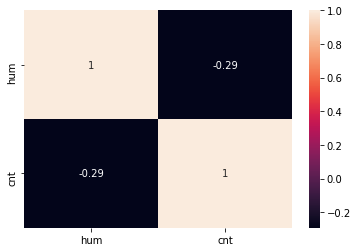

In [19]:
# Matriz de Correlação
import seaborn as sns
corr = df[['hum', 'cnt']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True)